In [217]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
import re
import matplotlib.ticker as mtick

In [5]:
G = nx.read_gexf("../data/gephi/translators_1800_2025_fiction.gexf")

In [7]:
all_languages = set([attributes["author_lang"] for node, attributes in G.nodes(data=True) if attributes["author_lang"] != "tõlkija"])

In [62]:
authors = [node for node in G.nodes() if G.nodes[node]["main_role"] == "autor"]
translators = [node for node in G.nodes() if G.nodes[node]["main_role"] == "tõlkija"]

In [6]:
def get_node_translators(G, node):  
    if G.nodes[node]["author_lang"] == "tõlkija":
        print(node)
        raise AssertionError
    node_translators = [n for n in nx.neighbors(G, node) if G.nodes[n]["author_lang"] == "tõlkija"]
    return node_translators


def get_language_subgraph(G, lang):
    language_authors = [node for node, attributes in G.nodes(data=True) if attributes["author_lang"] == lang]
    language_translators = []
    for node in language_authors:
        language_translators += get_node_translators(G, node)
    language_nodes = list(set(language_authors + language_translators))
    return nx.subgraph(G, language_nodes)

In [37]:
def get_degrees(G):
    degrees = nx.degree_histogram(G)
    degrees_expanded = []
    for i, d in enumerate(degrees):
        for node in range(d):
            degrees_expanded += [i]
    return degrees_expanded

In [45]:
sorted({lang: round(np.mean(get_degrees(get_language_subgraph(G, lang))), 3) for lang in all_languages}.items(), key=lambda x: x[1], reverse=True)

[('eng', 2.62),
 ('udm', 2.455),
 ('fre', 2.278),
 ('rus', 2.261),
 ('lav', 2.209),
 ('nor', 2.135),
 ('swe', 2.12),
 ('hun', 2.011),
 ('kom', 2.0),
 ('lit', 1.976),
 ('ger', 1.975),
 ('spa', 1.973),
 ('pol', 1.928),
 ('dan', 1.926),
 ('bel', 1.923),
 ('geo', 1.917),
 ('fin', 1.892),
 ('rum', 1.88),
 ('cze', 1.868),
 ('yid', 1.846),
 ('ita', 1.843),
 ('por', 1.84),
 ('other', 1.824),
 ('heb', 1.806),
 ('tat', 1.778),
 ('ukr', 1.72),
 ('jpn', 1.708),
 ('arm', 1.677),
 ('uzb', 1.667),
 ('bul', 1.636),
 ('chm', 1.636),
 ('ice', 1.622),
 ('aze', 1.6),
 ('dut', 1.592),
 ('gre', 1.524),
 ('oss', 1.5),
 ('alb', 1.5),
 ('tgk', 1.5),
 ('san', 1.5),
 ('slo', 1.455),
 ('tur', 1.417),
 ('hin', 1.4),
 ('grc', 1.375),
 ('ara', 1.375),
 ('rom', 1.333),
 ('kaz', 1.333),
 ('myv', 1.333),
 ('pro', 1.333),
 ('rus; rus', 1.333),
 ('peo', 1.333),
 ('cat', 1.333),
 ('sux', 1.333),
 ('kir', 1.333),
 ('slv', 1.333),
 ('chi', 1.263),
 ('per', 1.25),
 ('lat', 1.235),
 ('hrv', 1.2),
 ('den', 1.2),
 ('kor', 1.2),

In [66]:
def count_translator_languages(G, translator):
    languages = {}
    for edge in G.edges(translator):
        edge_lang = G.edges[edge]["language"]
        if edge_lang in languages.keys():
            languages[edge_lang] += 1
        else:
            languages[edge_lang] = 1
    return languages

In [56]:
count_translator_languages(G, "Jälle, Ülle")

{'eng': 130, 'nor': 1}

In [107]:
def get_translator_work_counts(G):
    results = dict()
    for t in translators:
        works = 0
        t_edges = G.edges(t)
        for edge in t_edges:
            works += len(G.edges[edge]["works"])
        results[t] = works
    results_sorted = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))
    return results_sorted

translator_work_counts = get_translator_work_counts(G)

def get_author_work_counts(G):
    results = dict()
    for a in authors:
        works = 0
        a_edges = G.edges(a)
        for edge in a_edges:
            works += len(G.edges[edge]["works"])
        results[a] = works
    results_sorted = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))
    return results_sorted

author_work_counts = get_author_work_counts(G)

In [282]:
for key, val in get_author_work_counts(G).items():
    print(key, "\t", val)


Cartland, Barbara 	 305
Roberts, Nora 	 174
Mallery, Susan 	 169
Christie, Agatha 	 165
Tolstoi, Lev 	 139
Lindgren, Astrid 	 133
Tšehhov, Anton 	 118
Dontsova, Darja 	 105
Gorki, Maksim 	 96
Grimm 	 94
Doyle, Arthur Conan 	 90
Perrault, Charles 	 86
Pratchett, Terry 	 84
Simon, Francesca 	 82
Andersen, Hans Christian 	 79
Brown, Sandra 	 78
Puškin, Aleksandr 	 75
Dostojevski, Fjodor 	 73
Carr, Robyn 	 70
Stout, Rex 	 69
Macomber, Debbie 	 69
Neels, Betty 	 67
Gardner, Erle Stanley 	 65
King, Stephen 	 64
Widmark, Martin 	 64
London, Jack 	 63
Maugham, William Somerset 	 61
Dumas, Alexandre 	 59
Beaton, M. C 	 57
Asimov, Isaac 	 55
Bô Yin Râ 	 55
Turgenev, Ivan 	 54
Waltari, Mika 	 51
Balzac, Honoré de 	 51
Dahl, Roald 	 51
Shakespeare, William 	 50
Rowling, J. K 	 50
Verne, Jules 	 49
Wallace, Edgar 	 49
Gogol, Nikolai 	 48
Martin, George R. R 	 47
Nesbø, Jo 	 47
Silverberg, Robert 	 45
Jansson, Tove 	 44
Kallas, Aino 	 43
Kipling, Rudyard 	 43
Petrone, Justin 	 43
Hamsun, Knut 	 42
G

In [279]:
get_author_work_counts(get_language_subgraph(G, "fre"))

{'Perrault, Charles': 86,
 'Dumas, Alexandre': 59,
 'Balzac, Honoré de': 51,
 'Verne, Jules': 49,
 'Hugo, Victor': 35,
 'Maupassant, Guy de': 32,
 'France, Anatole': 29,
 'Zola, Émile': 28,
 'Simenon, Georges': 26,
 'Rolland, Romain': 24,
 'Flaubert, Gustave': 23,
 'Saint-Exupéry, Antoine de': 21,
 'Molière': 21,
 'Camus, Albert': 21,
 'Sand, George': 20,
 'Gavalda, Anna': 20,
 'Souvestre, Pierre': 19,
 'Goscinny, René': 18,
 'Pétigny, Aline de': 18,
 'Leblanc, Maurice': 17,
 'Baudelaire, Charles': 16,
 'Boumans, Lieve': 16,
 'Maeterlinck, Maurice': 13,
 'Houellebecq, Michel': 13,
 'Voltaire': 12,
 'Loti, Pierre': 12,
 'Stendhal': 12,
 'Maurois, André': 11,
 'Boussenard, Louis Henri': 11,
 'Daudet, Alphonse': 11,
 'Walcker, Yann': 11,
 'Mérimée, Prosper': 10,
 'Druon, Maurice': 10,
 'Mauriac, François': 9,
 'Le Clézio, J. M. G': 9,
 'Sartre, Jean-Paul': 8,
 'Musso, Guillaume': 8,
 'Huston, Nancy': 8,
 'Chateaubriand, François René de': 7,
 'Musset, Alfred de': 7,
 'Gide, André': 7,
 'P

In [187]:
def rgb_code_to_tuple(rgb):
    return tuple([int(i) for i in rgb[4:-1].split(", ")])

def convert_rgb_to_float(rgb_tuple):
    """Convert an RGB tuple from the 0-255 range to the 0-1 range."""
    return tuple(c / 255 for c in rgb_tuple)

In [209]:
with open("../data/languages.json", "r", encoding="utf8") as f:
    lang_data = json.load(f)
    colors = lang_data["colors"]
    colors = {key: rgb_code_to_tuple(val) for key, val in colors.items()}
    label_map = lang_data["codes"]

In [224]:
df = pd.DataFrame(0, index=range(1800, 2024), columns=list(all_languages))

In [225]:
for edge in G.edges(data=True):
    attrs = edge[2]
    lang = attrs["language"]
    if lang in all_languages:
        for work in attrs["works"]:
            year = int(work[1])
            df.loc[year, lang] += 1

In [233]:
top10 = df.sum().sort_values(ascending=False)[:10].index
df = df[top10]

In [253]:
def plot_language_distribution(df, rolling=None, proportional=False, colors=None, label_map=None, savepath=None):
    """
    Plots a stacked area chart of book counts by language over years.
    
    Parameters:
    - df: DataFrame with years as the index and languages as columns.
    - rolling: integer, size of the rolling window for smoothing (optional).
    - proportional: boolean, if True, the chart will show the proportional distribution of languages.
    """
    
    # Apply rolling average if specified
    if rolling is not None and rolling > 1:
        df = df.rolling(window=rolling, min_periods=1).mean()
    
    # Convert to proportional values if specified
    if proportional:
        df = df.div(df.sum(axis=1), axis=0)
    
    if colors:
        # Convert each RGB color from 0-255 to 0-1 range
        converted_colors = {lang: convert_rgb_to_float(rgb) for lang, rgb in colors.items()}
        color_list = [converted_colors[col] for col in df.columns if col in converted_colors]
    else:
        color_list = None    
        
    # Plot
    ax = df.plot(kind='area', stacked=True, figsize=(10, 6), color=color_list, linewidth=0, alpha=1)

    #plt.grid()
    if proportional:
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    
    plt.xlabel('aasta')
    plt.ylabel('tõlkeväljaannete arv' if not proportional else 'avaldatud tõlkekirjanduse maht')
    #plt.title('Peamiste tõlke sihtkeelte muutumine ajas')
    if label_map:
        handles, labels = plt.gca().get_legend_handles_labels()
        new_labels = [label_map[label] if label in label_map else label for label in labels]
        plt.legend(handles, new_labels)

    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches="tight")
    plt.show()

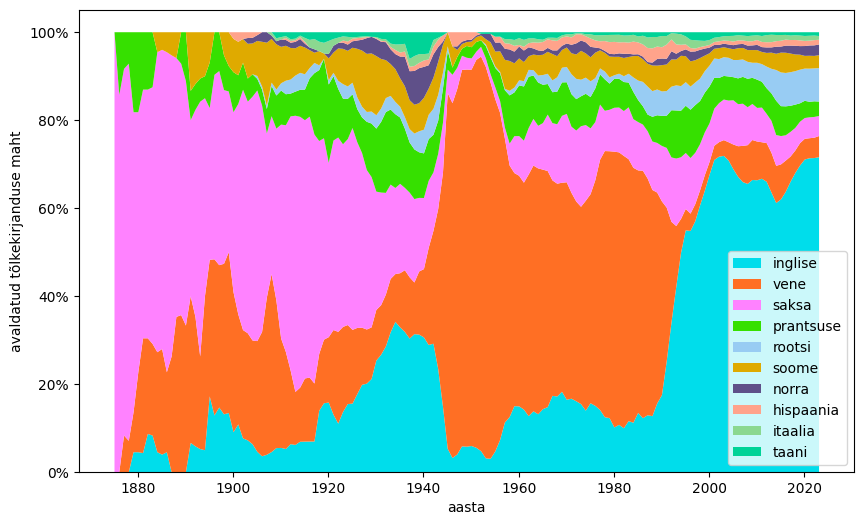

In [254]:
plot_language_distribution(df.loc[1875:], proportional=True, rolling=5, colors=colors, label_map=label_map, savepath="distribution.png")

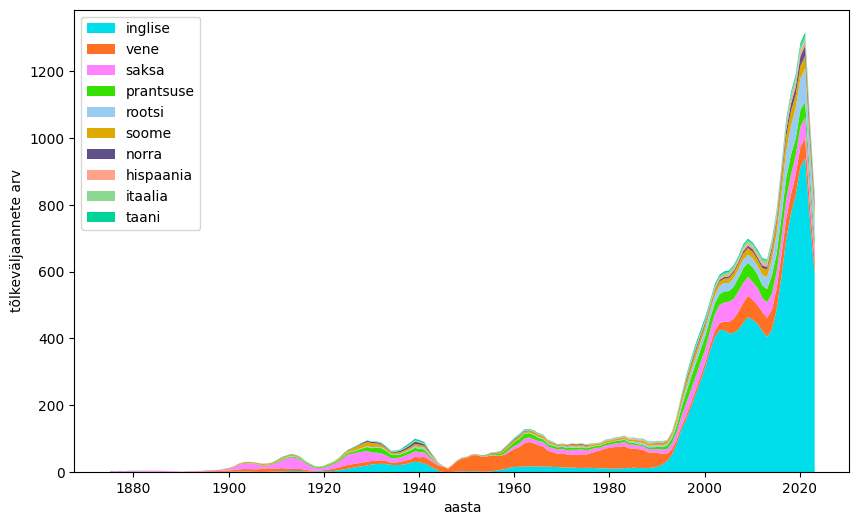

In [284]:
plot_language_distribution(df.loc[1875:], proportional=False, rolling=5, colors=colors, label_map=label_map, savepath="distribution_absolute.png")

<Axes: >

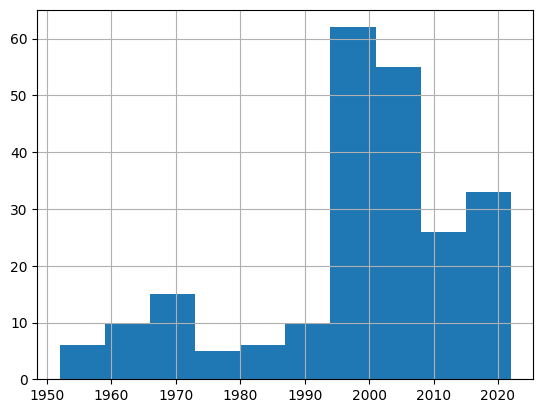

In [275]:
def activity_hist(node):
    years = []
    for edge in G.edges(node):
        for work in G.edges[edge]["works"]:
            years.append(int(work[1]))
    return pd.Series(years).hist()

activity_hist("Beekman, Vladimir")

In [259]:
G.edges[('Tolstoi, Lev', 'Sillaots, Marta')]["works"]

[('Sõda ja rahu', 1956.0, 1956.0),
 ('Sõda ja rahu', 1941.0, 1941.0),
 ('Sõda ja rahu', 1941.0, 1941.0),
 ('Sõda ja rahu', 1985.0, 1985.0),
 ('Sõda ja rahu', 1957.0, 1957.0),
 ('Sõda ja rahu', 1985.0, 1985.0),
 ('Sõda ja rahu', 1985.0, 1985.0),
 ('Sõda ja rahu', 1985.0, 1985.0),
 ('Sõda ja rahu', 1970.0, 1970.0),
 ('Sõda ja rahu', 1970.0, 1970.0),
 ('Sõda ja rahu', 1962.0, 1962.0),
 ('Sõda ja rahu', 1941.0, 1941.0),
 ('Sõda ja rahu', 2016.0, 2016.0),
 ('Sõda ja rahu', 2016.0, 2016.0)]